# Clasificación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/v2/resize:fit:1400/0*lzNKQdsjFVaymJTF.gif" width="400px" height="125px" />


El modelo de regresión lineal asume que la variable de respuesta es cuantitativa. En muchas situaciones la respuesta no suele ser cuantitativa, sino cualitativa.

Algunos ejemplos de variables cualitativas:
- Color de ojos
- Marca/modelo de un automóvil
- Marcas de celulares
- Tipos de animales
- Estado de salud

Esto no significa que las variables cualitativas no pueden tomar valores numéricos. Otro ejemplos de variables cualitativas son:
- Cilindraje de un automóvil
- Semestre que cursa un estudiante
- Lugar conseguido en una competencia

Vamos a referirnos a estas variables también como categóricas.

El proceso de utilizar regresión y otros métodos para la predicción de una respuesta cualitativa de una observación se conoce como clasificación, pues el resultado consiste en asignar una categoría a esa observación. El método que usaremos es regresión logística.

## 1. Descripción del problema

Los problemas de clasificación suelen ser los más comunes.
- ¿La letra que estoy leyendo es una *a*? ¿*b*? ¿*c*?
  - Cuando leemos estamos inconscientemente tomando decisiones sobre las características del caracter y clasificándolo como la letra que conocemos.
- Te sientes mal y vas al doctor. El doctor revisa tus síntomas y te dice qué padeces y cuál es el tratamiento.
  - Los factores son tus síntomas y el variable respuesta es tu condición. El doctor tiene los estudios para poder clasificar esos síntomas dada experiencia prueba.
- ¿Quién es esa persona?
  - Las personas recuerdan ciertas cosas de la gente que conoce (factores). Nariz, color de ojos, vello facial, peinado, lentes, etc.

De esta manera nos damos cuenta que para un problema de clasificación tenemos factores ($X$) y variables de respuesta ($y$) ne sets de observaciones $ (x_1, y_1), ..., (x_n, y_n) $

## 2. Introducción a regresión logística

La decisión más sencilla que se puede tomar es una de Sí/No. Modelemos un problema como la probabilidad de que la respuesta sea sí.

$$ p(X) = P(y=1|X) $$

¿Cuál es la posibilidad de que *y* sea 1 (sí) dado que los factores son de tal manera? E.g. te platican de una pizzería nueva. Eres vegetariano y tu pizza favorita lleva champiñones, albahaca, cebolla y masa delgada. Te invitan y te dan la siguiente información:
- Es una pizzería estilo Chicago.
- La especialidad de la casa es la pizza de 3 carnes.
- Tienes que viajar 2 horas para llegar.

Entonces, ¿cuál es la probabilidad de que digas que sí a esa invitación dados esos factores?

$$ P(y=1|\text{estilo: Chicago}, \text{sabor: 3 carnes}, \text{viaje: 2 horas})$$

---

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" width="400px" height="125px" />

Otro ejemplo. Vendes pasteles en un bazar donde la gente suele regatear. Tú tienes ya cierto criterio que te dice cuál es el precio mínimo al que vas a aceptar vender tu mercancía. Si viene una persona a comprar y ofrecerte cierto precio, ¿cuál será el resultado?

En este ejemplo sólo un factor afecta la variable de respuesta, y sabemos que la probabilidad de éxito es 100% cuando se excede el precio mínimo, y 0% cuando se ofrece menos.



Para modelar la probabilidad de éxito necesitamos una función cuya respuesta $p(X)\in[0,1]$.

$$ p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para ajustar el modelo y encontrar estimados de los coeficientes utilizamos el método de *máxima verosimilitud*.

## 3. Estimación de coeficientes

Para el caso de un solo factor existen los coeficientes desconocidos $\beta_0$ y $\beta_1$. La intuición detrás de usar la máxima verosimilitud para ajustar un modelo logístico es:
- Buscamos estimados para $\beta_0$ y $\beta_1$ tal que la predicción de la probabilidad $\hat{p}(x_i)$ sea lo más cercana posible a lo observado. En otras palabras, si la respuesta de $R$ observaciones fue sí, buscamos que nuestro modelo diga que $\hat{p}(x_i) \approx 1, \forall i \in R$.
- También buscamos que nuestro modelo diga $\hat{p}(x_i) \approx 1, \forall i \in G$ que para las $G$ observaciones donde la respuesta fue no nu

Esto lo podemos definir con la siguiente función:

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

Buscamos estimados $\hat{\beta_0}$ y $\hat{\beta_1}$ que maximicen esta función. La simplificación de la función es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

## 4. Variables de respuesta con más de dos resultados

Hay métodos que pueden ayudar a simplificar los casos para los cuáles la respuesta no es simplemente sí o no. La mayoría de las veces no es tan sencillo, pero aún así podemos utilizar este modelo y ajustarlo a nuestro favor.

Imagina que en un jardín tienes tres tipos de plantas de iris. Se miden los sépalos y pétalos de todas las plantas en el jardín.

In [31]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
df_iris = pd.DataFrame(columns=iris.feature_names, data=iris.data)
df_iris["Class"] = iris.target
df_iris["Class"] = df_iris["Class"].astype(str)
df_iris.loc[:, "Class"] = df_iris["Class"].replace(['0', '1', '2'], iris.target_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
import numpy as np

1. Cargar datos
2. Exraer caracteristicas o factores o variables
Veo en la tabla 4 factores y propongo el modelo

$$ \hat p(x) = \fracc {1}{ 1 + e^(-\beta_0 + \beta_1 s_1 + \beta_2 s_w + \beta_3 p_l + \beta_4 p _w)} $$

Como veo 5 betas significa que tengo 5 factores en total (incluyendolo el de 1).

Por lo tanto X va a tener  columnas

In [51]:
y_setosa = df_iris["Class"] == "setosa"
n = len(y_setosa)
ones = np.ones([n, 1])
sl = np.reshape(df_iris["sepal length (cm)"], [n, 1])
sw = np.reshape(df_iris["sepal width (cm)"], [n, 1])
pl = np.reshape(df_iris["petal length (cm)"], [n, 1])
pw = np.reshape(df_iris["petal width (cm)"], [n, 1])

X = np.hstack((ones, sl, sw, pl, pw))  
y_vector = np.reshape(y_setosa.astype(int), [n, 1])

3. Funciones de probabilidad y de costo

In [49]:
def pr(beta, x):
    return 1/(1 + np.exp(-X @ beta))

def J(beta, X, y):
    epsilon = 1e-12
    n, p = X.shape
    beta = np.reshape(beta, [p,1])
    y_pred = pr(beta, X)
    e = y*np.log(y_pred + epsilon) + (1-y)*np.log(1 - y_pred + epsilon)
    return - (np.sum(e) + np.linalg.norm(beta))
    

4. Ajustamos

In [50]:
import scipy.optimize as opt

beta=[0, 0, 0, 0, 0]

log = opt.minimize(J, beta, args=(X, y_vector))

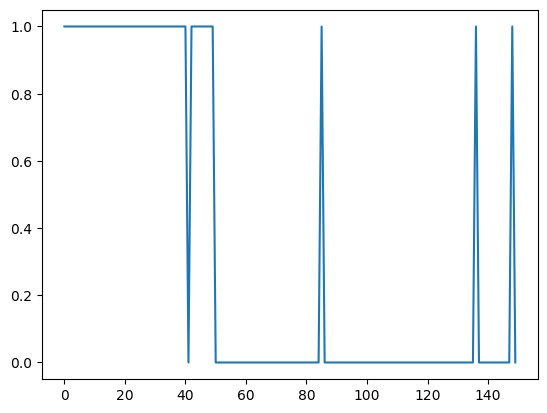

In [47]:
beta_r = np.reshape(log.x, [5,1])
pr(beta_r, X)

import matplotlib.pyplot as plt
plt.figure ()
plt.plot(pr(beta_r, X))

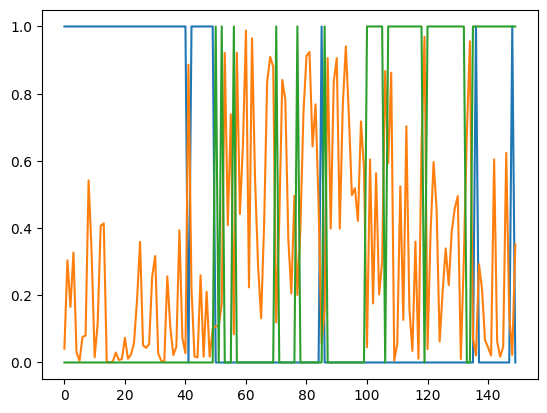

In [57]:
y_versicolor = df_iris["Class"] == "versicolor"
y_virginica= df_iris["Class"] == "virginica"

y_vector_ver = np.reshape(y_versicolor, [n, 1])
y_vector_vir = np.reshape(y_virginica, [n, 1])

log_versicolor = opt.minimize(J, beta, args=(X, y_vector_ver))
log_virginica = opt.minimize(J, beta, args=(X, y_vector_vir))

beta_versicolor = np.reshape(log_versicolor.x, [5, 1])
beta_virginica = np.reshape(log_virginica.x, [5, 1])

plt.figure()
plt.plot(pr(beta_r, X))
plt.plot(pr(beta_versicolor, X))
plt.plot(pr(beta_virginica, X))

In [59]:
def iris(beta_setosa, beta_versicolor, beta_virginica, X):
    pr_setosa = pr(beta_setosa, X)
    pr_versicolor = pr(beta_versicolor, X)
    pr_virginica = pr(beta_virginica, X)
    res = np.hstack((pr_setosa, pr_versicolor, pr_virginica))
    return np.argmax(res, axis=1)

iris(beta_r, beta_versicolor, beta_virginica, X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

Tienes largo y ancho de sépalos y pétalos como variables y el tipo de iris como respuesta; hay más de dos tipos de iris. ¿Cómo podemos ajustar nuestro modelo para que dados los datos de medición podamos decir qué tipo de iris es?

No lo hacemos. Generamos diferentes modelos que me respondan sí/no. Dadas las mediciones:
- ¿Cuál es la probabilidad de que el iris sea setosa?
- ¿Cuál es la probabilidad de que el iris sea versicolor?
- ¿Cuál es la probabilidad de que el iris sea virginica?

Si los factores recolectados son los correctos, idealmente tendríamos bajas probabilidades para los tipos que la planta no es, y una probabilidad alta con la que sí se debería asociar.

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_vector, test_size = 0.5)

log_split_setosa = opt.minimize(J, beta, args=(X_train, y_train))
beta_split_setosa = np.reshape(log_split_setosa.x, [5,1])
pr_test = np.round(pr(beta_split_setosa, X_test))
(pr_test == y_test).sum()

<class 'ValueError'>: operands could not be broadcast together with shapes (75,1) (150,1) 

**Problema**: ¿Cómo sabemos que las características recolectadas son las correctas?

¿Cómo se puede saber si una variable realmente depende de otra variable? ¿Cómo sabemos incluso si una variable es independiente?

![](https://tylervigen.com/spurious/correlation/image/2730_the-distance-between-uranus-and-the-moon_correlates-with_electricity-generation-in-japan.svg)

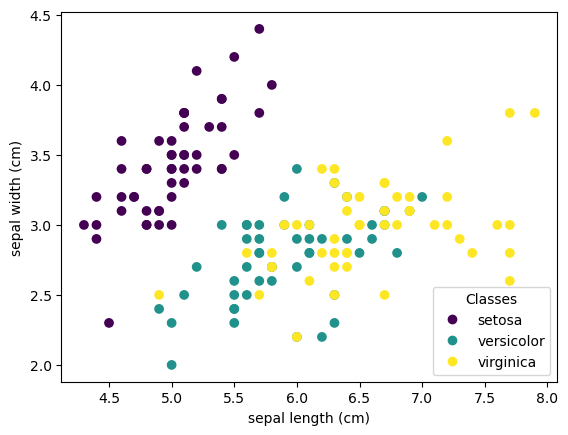

In [2]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### Ejercicio

1. Utiliza el 50% de los datos para ajustar un modelo de regresión logística que identifique especies de iris dados los anchos y largos de sus sépalos y pétalos.
2. Crea una función que me diga la predicción de especie dados los datos.
3. Prueba el 50% de los datos restantes y compara las predicciones con los datos observados.

## Referencias

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3